In [1]:
!pip install python-docx
from paddleocr import PaddleOCR

ocr = PaddleOCR(use_angle_cls=True, lang='korean')

[2025/03/28 14:37:35] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\USER/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\USER/.paddleocr/whl\\rec\\korean\\korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_sha

In [2]:
!pip install pymupdf
!pip install pandas

In [3]:
!pip install matplotlib
!pip install pdf2image

In [118]:
# 재실행: PyMuPDF로 PDF에서 텍스트 + 위치 좌표 추출
import fitz  # PyMuPDF
import pandas as pd

# PDF 경로 (업로드된 파일)
pdf_path = "C:/Users/USER/reportover/학습데이터/kcmii2_false_1.pdf"

# PDF 열기
doc = fitz.open(pdf_path)

# 1페이지 기준으로 텍스트 + 좌표 추출
page = doc.load_page(0)
blocks = page.get_text("dict")['blocks']

# 텍스트와 해당 위치(bbox)를 정리
text_data = []
for b in blocks:
    if b['type'] == 0:  # 텍스트 블록일 경우
        for line in b['lines']:
            for span in line['spans']:
                bbox = span['bbox']  # [x0, y0, x1, y1]
                text = span['text'].strip()
                if text:
                    text_data.append({
                        'text': text,
                        'bbox': bbox
                    })

df = pd.DataFrame(text_data)

In [119]:
df

,text,bbox
0,학지고등학교,"(46.78799819946289, 162.3569793701172, 102.787..."
1,1 학년 01 반 01번,"(156.2050018310547, 162.3569793701172, 230.515..."
2,김진로,"(276.3940124511719, 162.3569793701172, 304.794..."
3,남,"(376.7409973144531, 162.3569793701172, 386.740..."
4,2024년 12월 05일,"(452.1419982910156, 162.3569793701172, 529.421..."
...,...,...
110,활동선호도,"(543.6060180664062, 632.2435302734375, 581.045..."
111,직업선호도,"(543.6060180664062, 643.2435302734375, 581.045..."
112,전공교과선호도,"(543.6060180664062, 654.2435302734375, 595.765..."
113,해석동영상을 확인하려면,"(603.22900390625, 55.220008850097656, 686.6208..."


In [120]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# PDF → 이미지로 변환 (1페이지)
from pdf2image import convert_from_path
page_image = convert_from_path(pdf_path, dpi=150)[0]  # 낮은 해상도로 빠르게 보기

In [121]:
pdf_width, pdf_height = page.rect.width, page.rect.height
img_width, img_height = page_image.size
print('pdf 높이 :', pdf_width,'pdf 넓이 :', pdf_height)
print('image 높이 :', img_width, 'image 넓이 :', img_height)

pdf 높이 : 1191.0 pdf 넓이 : 842.0
image 높이 : 2482 image 넓이 : 1755


In [122]:
# 스케일 비율 계산 (pt → px 변환)
scale_x = img_width / pdf_width
scale_y = img_height / pdf_height

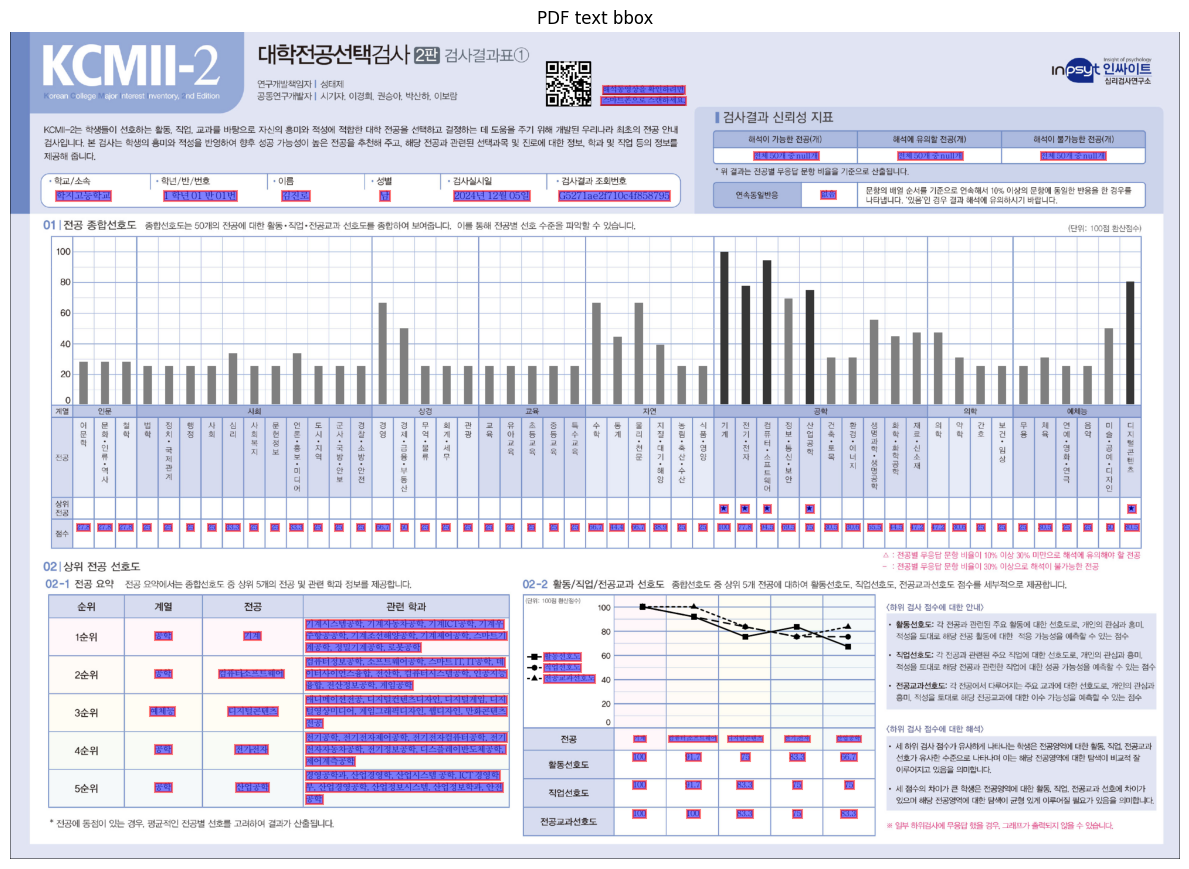

In [123]:
# 시각화
fig, ax = plt.subplots(figsize=(12, 16))
ax.imshow(page_image)
ax.set_title("PDF text bbox")
ax.axis('off')

# bbox를 이미지 좌표로 변환해서 그리기
for entry in text_data:
    x0, y0, x1, y1 = entry['bbox']
    ix0 = x0 * scale_x
    iy0 = y0 * scale_y
    ix1 = x1 * scale_x
    iy1 = y1 * scale_y

    rect = Rectangle(
        (ix0, iy0),
        ix1 - ix0,
        iy1 - iy0,
        linewidth=1.5,
        edgecolor='red',
        facecolor='blue',
        alpha=0.5
    )
    ax.add_patch(rect)
    #ax.text(ix0, iy0, entry['text'], fontsize=7, color='blue')

plt.tight_layout()
plt.show()

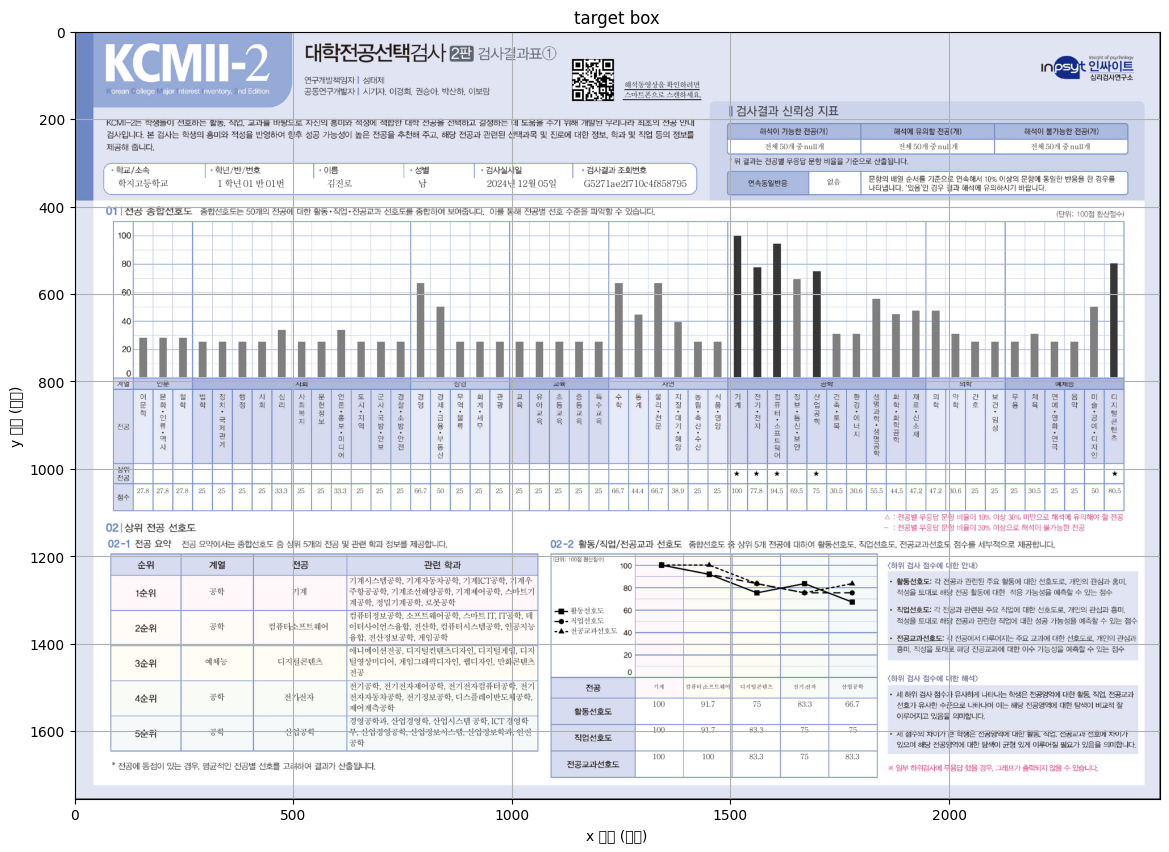

In [124]:
fig, ax = plt.subplots(figsize=(14, 18))
ax.imshow(page_image)
ax.set_title("target box")
ax.set_xlabel("x 좌표 (픽셀)")
ax.set_ylabel("y 좌표 (픽셀)")
ax.grid(True)  # 격자 켜기
ax.axis('on')  # 눈금 켜기
plt.show()

In [125]:
df[df['text']=='27.8']['bbox'].values

array([(67.77999877929688, 500.9029846191406, 81.5770034790039, 507.9029846191406),
       (89.322998046875, 500.9029846191406, 103.12000274658203, 507.9029846191406),
       (110.86699676513672, 500.9029846191406, 124.66400146484375, 507.9029846191406)],
      dtype=object)

In [126]:
df[df['text']=='80.5']['bbox'].values

array([(1134.7410888671875, 500.9029846191406, 1148.5382080078125, 507.9029846191406)],
      dtype=object)

In [127]:
print(df[df['text']=='27.8']['bbox'].values[0][0])
print(df[df['text']=='27.8']['bbox'].values[0][2])

67.77999877929688
81.5770034790039


In [128]:
# 첫번째 값이 등장하는 좌표 (a0, b0, a1, b1)
# 67.77999877929688, 500.9029846191406, 81.5770034790039, 507.9029846191406
# 마지막 값이 등장하는 좌표 (x0, y0, x1, y1)
# 1134.7410888671875, 500.9029846191406, 1148.5382080078125, 507.9029846191406

box_list = [df[df['text']=='27.8']['bbox'].values[0][0], df[df['text']=='27.8']['bbox'].values[0][1],\
            df[df['text']=='80.5']['bbox'].values[0][2], df[df['text']=='80.5']['bbox'].values[0][3]]
print(box_list)

[67.77999877929688, 500.9029846191406, 1148.5382080078125, 507.9029846191406]


67.77999877929688 500.9029846191406 1148.5382080078125 507.9029846191406


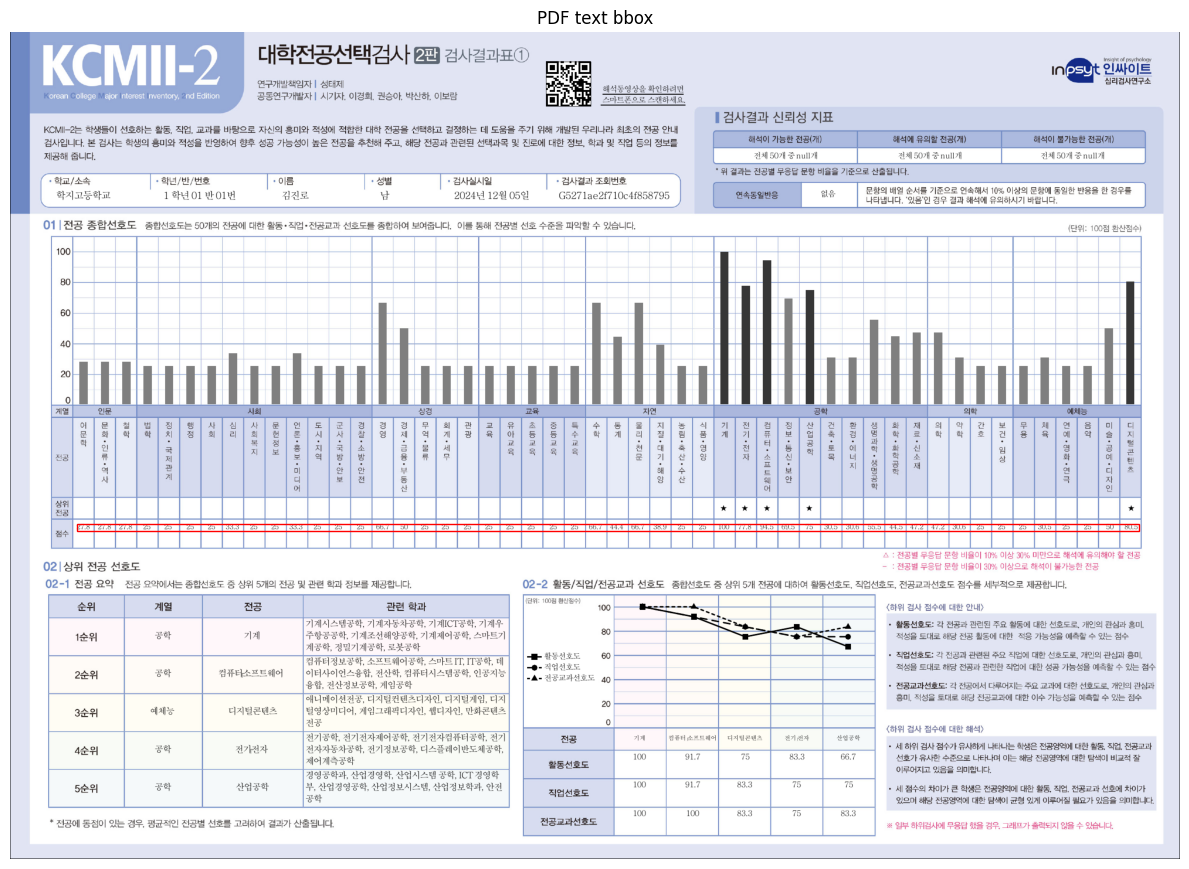

In [129]:
# 첫번째 값이 등장하는 좌표 (a0, b0, a1, b1)
# 67.77999877929688, 500.9029846191406, 81.5770034790039, 507.9029846191406
# 마지막 값이 등장하는 좌표 (x0, y0, x1, y1)
# 1134.7410888671875, 500.9029846191406, 1148.5382080078125, 507.9029846191406
# 시각화
fig, ax = plt.subplots(figsize=(12, 16))
ax.imshow(page_image)
ax.set_title("PDF text bbox")
ax.axis('off')

# bbox를 이미지 좌표로 변환해서 그리기
# 리스트 한번 더 감싸야 언팩됨
for x0, y0, x1, y1 in [box_list]:
    print(x0, y0, x1, y1)
    ix0 = x0 * scale_x
    iy0 = y0 * scale_y
    ix1 = x1 * scale_x
    iy1 = y1 * scale_y

    rect = Rectangle(
        (ix0, iy0),
        ix1 - ix0,
        iy1 - iy0,
        linewidth=1,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

In [130]:
df

,text,bbox
0,학지고등학교,"(46.78799819946289, 162.3569793701172, 102.787..."
1,1 학년 01 반 01번,"(156.2050018310547, 162.3569793701172, 230.515..."
2,김진로,"(276.3940124511719, 162.3569793701172, 304.794..."
3,남,"(376.7409973144531, 162.3569793701172, 386.740..."
4,2024년 12월 05일,"(452.1419982910156, 162.3569793701172, 529.421..."
...,...,...
110,활동선호도,"(543.6060180664062, 632.2435302734375, 581.045..."
111,직업선호도,"(543.6060180664062, 643.2435302734375, 581.045..."
112,전공교과선호도,"(543.6060180664062, 654.2435302734375, 595.765..."
113,해석동영상을 확인하려면,"(603.22900390625, 55.220008850097656, 686.6208..."


In [131]:
# bbox 컬럼을 4개 열로 분리
df[['x0', 'y0', 'x1', 'y1']] = pd.DataFrame(df['bbox'].tolist(), index=df.index)

In [132]:
df

,text,bbox,x0,y0,x1,y1
0,학지고등학교,"(46.78799819946289, 162.3569793701172, 102.787...",46.787998,162.356979,102.787987,172.356979
1,1 학년 01 반 01번,"(156.2050018310547, 162.3569793701172, 230.515...",156.205002,162.356979,230.515030,172.356979
2,김진로,"(276.3940124511719, 162.3569793701172, 304.794...",276.394012,162.356979,304.794037,172.356979
3,남,"(376.7409973144531, 162.3569793701172, 386.740...",376.740997,162.356979,386.740997,172.356979
4,2024년 12월 05일,"(452.1419982910156, 162.3569793701172, 529.421...",452.141998,162.356979,529.421936,172.356979
...,...,...,...,...,...,...
110,활동선호도,"(543.6060180664062, 632.2435302734375, 581.045...",543.606018,632.243530,581.045959,640.243530
111,직업선호도,"(543.6060180664062, 643.2435302734375, 581.045...",543.606018,643.243530,581.045959,651.243530
112,전공교과선호도,"(543.6060180664062, 654.2435302734375, 595.765...",543.606018,654.243530,595.765930,662.243530
113,해석동영상을 확인하려면,"(603.22900390625, 55.220008850097656, 686.6208...",603.229004,55.220009,686.620850,63.220009


In [133]:
x_min, y_min, x_max, y_max = box_list
print(x_min, y_min, x_max, y_max)
# 해당 영역 데이터 추출
df_in_box = df[
    (df['x0'] >= x_min) & (df['x0'] <= x_max) &
    (df['y0'] >= y_min) & (df['y0'] <= y_max)
]

67.77999877929688 500.9029846191406 1148.5382080078125 507.9029846191406


In [134]:
df_in_box['text'].values

array(['27.8', '27.8', '27.8', '25', '25', '25', '25', '33.3', '25', '25',
       '33.3', '25', '25', '25', '66.7', '50', '25', '25', '25', '25',
       '25', '25', '25', '25', '66.7', '44.4', '66.7', '38.9', '25', '25',
       '100', '77.8', '94.5', '69.5', '75', '30.5', '30.6', '55.5',
       '44.5', '47.2', '47.2', '30.6', '25', '25', '25', '30.5', '25',
       '25', '50', '80.5'], dtype=object)

### pdf 리포트 중 그래프의 수치를 추측할 수 있는 방법 탐색

In [135]:
# true pdf에서 이미지 변환 후 그래프 부분 잘라서 학습 데이터로 마련해야함
!pip install pdf2image
import os
from pdf2image import convert_from_path

# PDF가 있는 폴더 경로
pdf_folder = "C:/Users/USER/reportover/학습데이터"
output_folder = "C:/Users/USER/reportover/images"

# 폴더가 없으면 생성
os.makedirs(output_folder, exist_ok=True)

# 모든 PDF 파일을 반복
for filename in os.listdir(pdf_folder):
    if filename.lower().endswith(".pdf"):
        pdf_path = os.path.join(pdf_folder, filename)

        # 첫 페이지만 변환
        images = convert_from_path(pdf_path, dpi=150, first_page=1, last_page=1)

        base_name = os.path.splitext(filename)[0]

        # 첫 페이지만 저장
        img_path = os.path.join(output_folder, f"{base_name}_p1.png")
        images[0].save(img_path, "PNG")
        print(f"저장 완료: {img_path}")

저장 완료: C:/Users/USER/reportover/images\kcmii2_false_1_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_1_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_10_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_11_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_12_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_13_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_14_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_15_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_2_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_3_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_4_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_5_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_6_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_7_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_8_p1.png
저장 완료: C:/Users/USER/reportover/images\kcmii2_true_9_p1.png


67.77999877929688 500.9029846191406 1148.5382080078125 507.9029846191406


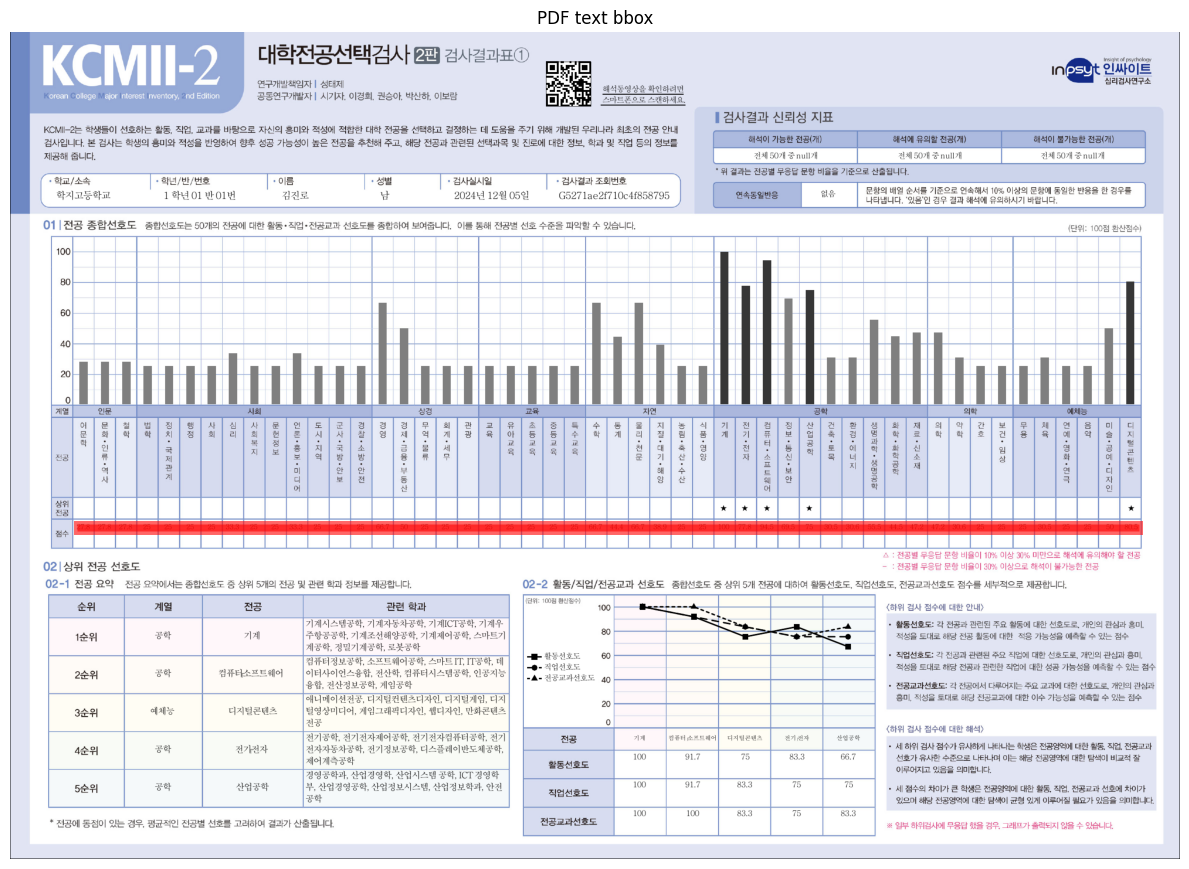

In [136]:
crop_box_list = [46.78799819946289, 210.3569793701172, 1148.5382080078125, 380.9029846191406]

# 시각화
fig, ax = plt.subplots(figsize=(12, 16))
ax.imshow(page_image)
ax.set_title("PDF text bbox")
ax.axis('off')

# bbox를 이미지 좌표로 변환해서 그리기
# 리스트 한번 더 감싸야 언팩됨
for x0, y0, x1, y1 in [box_list]:
    print(x0, y0, x1, y1)
    ix0 = x0 * scale_x
    iy0 = y0 * scale_y
    ix1 = x1 * scale_x
    iy1 = y1 * scale_y

    rect = Rectangle(
        (ix0, iy0),
        ix1 - ix0,
        iy1 - iy0,
        linewidth=5,
        edgecolor='red',
        facecolor='red',
        alpha=0.6
    )
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

In [137]:
crop_box_list = [46.78799819946289, 210.3569793701172, 1148.5382080078125, 380.9029846191406]
x0, y0, x1, y1 = crop_box_list

ix0 = x0 * scale_x
iy0 = y0 * scale_y
ix1 = x1 * scale_x
iy1 = y1 * scale_y

In [138]:
import os
from PIL import Image, ImageOps

# 이미지 폴더 경로
img_folder = r"C:\Users\USER\reportover\images"
output_folder = r"C:\Users\USER\reportover\graph_crops"
os.makedirs(output_folder, exist_ok=True)

# 46개 막대그래프 전체가 포함된 crop 좌표
# 너가 측정한 좌표로 바꿔줘야 해
crop_box = (ix0, iy0, ix1, iy1)  # 예시

# 이미지 반복 처리
for filename in os.listdir(img_folder):
    if filename.lower().endswith(".png"):
        img_path = os.path.join(img_folder, filename)
        img = Image.open(img_path)

        # 전체 그래프 영역 crop
        cropped = img.crop(crop_box)

        # 흑백 변환
        gray = ImageOps.grayscale(cropped)

        # 저장
        base = os.path.splitext(filename)[0]
        save_path = os.path.join(output_folder, f"{base}_graph.png")
        gray.save(save_path)
        print(f"저장 완료: {save_path}")

저장 완료: C:\Users\USER\reportover\graph_crops\kcmii2_false_1_p1_graph.png
저장 완료: C:\Users\USER\reportover\graph_crops\kcmii2_true_10_p1_graph.png
저장 완료: C:\Users\USER\reportover\graph_crops\kcmii2_true_11_p1_graph.png
저장 완료: C:\Users\USER\reportover\graph_crops\kcmii2_true_12_p1_graph.png
저장 완료: C:\Users\USER\reportover\graph_crops\kcmii2_true_13_p1_graph.png
저장 완료: C:\Users\USER\reportover\graph_crops\kcmii2_true_14_p1_graph.png
저장 완료: C:\Users\USER\reportover\graph_crops\kcmii2_true_15_p1_graph.png
저장 완료: C:\Users\USER\reportover\graph_crops\kcmii2_true_1_p1_graph.png
저장 완료: C:\Users\USER\reportover\graph_crops\kcmii2_true_2_p1_graph.png
저장 완료: C:\Users\USER\reportover\graph_crops\kcmii2_true_3_p1_graph.png
저장 완료: C:\Users\USER\reportover\graph_crops\kcmii2_true_4_p1_graph.png
저장 완료: C:\Users\USER\reportover\graph_crops\kcmii2_true_5_p1_graph.png
저장 완료: C:\Users\USER\reportover\graph_crops\kcmii2_true_6_p1_graph.png
저장 완료: C:\Users\USER\reportover\graph_crops\kcmii2_true_7_p1_graph.png